# Exploration du dataset Sentiment140

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chargement du dataset depuis le dossier data
df = pd.read_csv(
    "../data/sentiment140.csv",
    encoding="latin-1",
    header=None
)

# Attribution des noms de colonnes
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Conversion des labels : 0 = négatif, 4 = positif → 0/1
df["target"] = df["target"].apply(lambda x: 1 if x == 4 else 0)

# Échantillonnage équilibré de 16 000 tweets
df_neg = df[df["target"] == 0].sample(8000, random_state=42)
df_pos = df[df["target"] == 1].sample(8000, random_state=42)
df_small = pd.concat([df_neg, df_pos]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Taille du dataset réduit :", df_small.shape)
print(df_small["target"].value_counts())

# Découpage Train / Validation / Test
train_df, test_df = train_test_split(
    df_small, test_size=0.2, random_state=42, stratify=df_small["target"]
)

train_texts, val_texts, y_train, y_val = train_test_split(
    train_df["text"], train_df["target"], test_size=0.2, random_state=42, stratify=train_df["target"]
)

print("Train:", len(train_texts))
print("Validation:", len(val_texts))
print("Test:", len(test_df))

# Sauvegarde du dataset réduit pour réutilisation
df_small.to_csv("../data/sentiment140_light.csv", index=False, encoding="utf-8")
print("Fichier sentiment140_light.csv créé dans /data")


Taille du dataset réduit : (16000, 6)
target
1    8000
0    8000
Name: count, dtype: int64
Train: 10240
Validation: 2560
Test: 3200
Fichier sentiment140_light.csv créé dans /data


,target,id,date,flag,user,text
0,1,2007530999,Tue Jun 02 12:46:34 PDT 2009,NO_QUERY,Zensunni,@pbadstibner I have good balance..used to do m...
1,0,2053389416,Sat Jun 06 04:22:50 PDT 2009,NO_QUERY,nikki050572,@gtissa Still having issue and it's GDI!!! The...
2,0,2202299998,Tue Jun 16 21:33:49 PDT 2009,NO_QUERY,BigBossBeta,@Chrismorris528 Sigh. In 3 hours. It sucks to ...
3,0,2013656571,Tue Jun 02 23:13:29 PDT 2009,NO_QUERY,haushi87,@HelloEli exacly
4,1,1677310858,Sat May 02 01:26:00 PDT 2009,NO_QUERY,tristantales,In fairness. He smells good.



--- Informations générales ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  16000 non-null  int64 
 1   id      16000 non-null  int64 
 2   date    16000 non-null  object
 3   flag    16000 non-null  object
 4   user    16000 non-null  object
 5   text    16000 non-null  object
dtypes: int64(2), object(4)
memory usage: 750.1+ KB

--- Statistiques globales ---


,target,id,date,flag,user,text
count,16000.000000,1.600000e+04,16000,16000,16000,16000
unique,NaN,NaN,15832,1,15291,15987
top,NaN,NaN,Tue Jun 02 06:22:50 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,2,16000,8,5
mean,0.500000,1.999674e+09,NaN,NaN,NaN,NaN
std,0.500016,1.943592e+08,NaN,NaN,NaN,NaN
min,0.000000,1.467816e+09,NaN,NaN,NaN,NaN
25%,0.000000,1.957240e+09,NaN,NaN,NaN,NaN
50%,0.500000,2.002712e+09,NaN,NaN,NaN,NaN
75%,1.000000,2.177771e+09,NaN,NaN,NaN,NaN



--- Valeurs manquantes ---
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


C:\Users\vicau\AppData\Local\Temp\ipykernel_1648\3988785873.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="viridis")


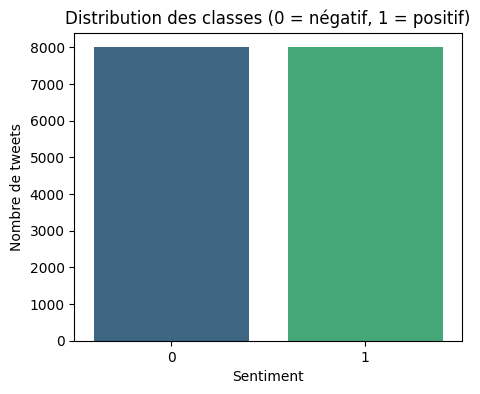

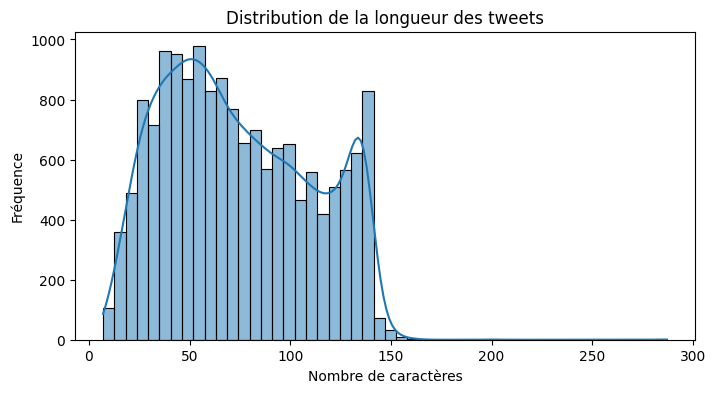


--- Longueurs moyennes des tweets ---
         count       mean        std  min   25%   50%    75%    max
target                                                             
0       8000.0  74.730750  36.820894  7.0  44.0  70.0  104.0  198.0
1       8000.0  73.596375  35.882386  8.0  44.0  68.0  102.0  287.0

--- Exemples de tweets négatifs ---


1    @gtissa Still having issue and it's GDI!!! The...
2    @Chrismorris528 Sigh. In 3 hours. It sucks to ...
3                                    @HelloEli exacly 
6              http://bit.ly/Wl9yL  i want to go here 
8    @TrueBunbarian I bet you are counting down. Ye...
Name: text, dtype: object


--- Exemples de tweets positifs ---


0    @pbadstibner I have good balance..used to do m...
4                        In fairness. He smells good. 
5    beats the heat with cool guava juice in handi ...
7    @YouHerevideo  I recommend Tweetdeck - you can...
9    @fattysammy Is perfectly cooked and delicious ...
Name: text, dtype: object

In [3]:
# Exploration rapide du dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset réduit
df = pd.read_csv("../data/sentiment140_light.csv", encoding="utf-8")

# Aperçu général
display(df.head())
print("\n--- Informations générales ---")
df.info()

print("\n--- Statistiques globales ---")
display(df.describe(include='all'))

# Vérification des valeurs manquantes
print("\n--- Valeurs manquantes ---")
print(df.isna().sum())

# Distribution de la variable cible
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="viridis")
plt.title("Distribution des classes (0 = négatif, 1 = positif)")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de tweets")
plt.show()

# Longueur des tweets
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution de la longueur des tweets")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()

print("\n--- Longueurs moyennes des tweets ---")
print(df.groupby("target")["text_length"].describe())

# Exemple de tweets positifs et négatifs
print("\n--- Exemples de tweets négatifs ---")
display(df[df["target"] == 0]["text"].head(5))

print("\n--- Exemples de tweets positifs ---")
display(df[df["target"] == 1]["text"].head(5))


# Entraînement et évaluation des modèles

## Initialisation et préparation du jeu de données (structure 70/15/15)

In [4]:
# === Préparation commune alignée sur la production (70/15/15) ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset réduit
df = pd.read_csv("../data/sentiment140_light.csv", encoding="utf-8")
X = df["text"]
y = df["target"]

# Split train / val / test (≈ 70 / 15 / 15)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.15/0.85, random_state=42, stratify=y_temp
)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} - Matrice de confusion")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()

print(f"Tailles : train={len(X_train)}, val={len(X_val)}, test={len(X_test)}")


Tailles : train=11200, val=2400, test=2400


### 1. TF-IDF + Logistic Regression

=== Logistic Regression (lemmatisation spaCy) ===
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1200
           1       0.70      0.72      0.71      1200

    accuracy                           0.71      2400
   macro avg       0.71      0.71      0.71      2400
weighted avg       0.71      0.71      0.71      2400

Accuracy: 0.7095833333333333
F1-score: 0.7139926138695117


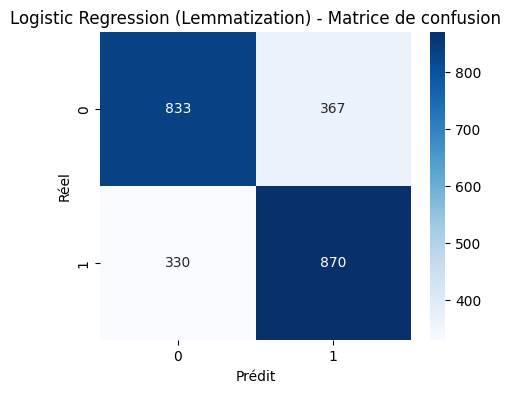

In [5]:
# === TF-IDF + Logistic Regression avec lemmatisation ===
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Charger le modèle spaCy anglais
nlp = spacy.load("en_core_web_sm")

# Fonction de prétraitement : nettoyage + lemmatisation
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # enlève ponctuation et chiffres
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Application du prétraitement
X_train_prep = X_train.apply(preprocess_text)
X_test_prep = X_test.apply(preprocess_text)

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train_prep)
X_test_tfidf  = vectorizer.transform(X_test_prep)

# Entraînement du modèle
model_lr = LogisticRegression(max_iter=300, random_state=42)
model_lr.fit(X_train_tfidf, y_train)

# Prédictions
y_pred_lr = model_lr.predict(X_test_tfidf)

# Évaluation
print("=== Logistic Regression (lemmatisation spaCy) ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression (Lemmatization)")


#### Cross-validation

In [6]:
# === Validation croisée : TF-IDF + Logistic Regression ===
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy as np

# Pipeline complet : TF-IDF → Logistic Regression
pipeline_lr = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("clf", LogisticRegression(max_iter=300))
])

# Configuration de la validation croisée stratifiée (pour respecter l’équilibre des classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation F1-score (mesure adaptée aux classes équilibrées)
scores = cross_val_score(
    pipeline_lr,
    X_train,           # uniquement sur les données d'entraînement
    y_train,
    cv=cv,
    scoring="f1"
)

print("=== Validation croisée : Logistic Regression ===")
print(f"F1-score moyen : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")
print(f"Toutes les valeurs : {np.round(scores, 4)}")


=== Validation croisée : Logistic Regression ===
F1-score moyen : 0.7169
Écart-type : 0.0044
Toutes les valeurs : [0.72   0.7085 0.7165 0.7207 0.7189]


### 2. TF-IDF + Random Forest

=== Random Forest (lemmatisation spaCy) ===
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1200
           1       0.68      0.72      0.70      1200

    accuracy                           0.69      2400
   macro avg       0.69      0.69      0.69      2400
weighted avg       0.69      0.69      0.69      2400

Accuracy: 0.6916666666666667
F1-score: 0.6991869918699187


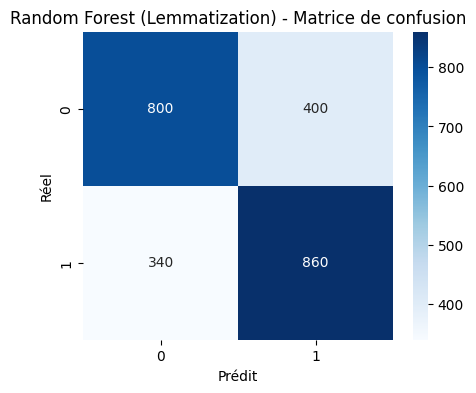

In [7]:
# === TF-IDF + Random Forest avec lemmatisation ===
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Charger le modèle linguistique spaCy
nlp = spacy.load("en_core_web_sm")

# Fonction de prétraitement (lemmatisation)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Application du prétraitement
X_train_prep = X_train.apply(preprocess_text)
X_test_prep = X_test.apply(preprocess_text)

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train_prep)
X_test_tfidf  = vectorizer.transform(X_test_prep)

# Modèle Random Forest
model_rf = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1  # exploitation de tous les cœurs CPU
)

model_rf.fit(X_train_tfidf, y_train)
y_pred_rf = model_rf.predict(X_test_tfidf)

# Évaluation
print("=== Random Forest (lemmatisation spaCy) ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest (Lemmatization)")


#### Cross-validation

In [8]:
# === Validation croisée : TF-IDF + Random Forest ===
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Pipeline complet : TF-IDF → Random Forest
pipeline_rf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, stop_words="english")),
    ("clf", RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1))
])

# Validation croisée stratifiée à 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation sur le F1-score
scores_rf = cross_val_score(
    pipeline_rf,
    X_train,
    y_train,
    cv=cv,
    scoring="f1"
)

print("=== Validation croisée : Random Forest ===")
print(f"F1-score moyen : {scores_rf.mean():.4f}")
print(f"Écart-type : {scores_rf.std():.4f}")
print(f"Toutes les valeurs : {np.round(scores_rf, 4)}")


=== Validation croisée : Random Forest ===
F1-score moyen : 0.7093
Écart-type : 0.0116
Toutes les valeurs : [0.7134 0.6863 0.7183 0.713  0.7154]


### 3. TF-IDF + Naive Bayes

=== Naive Bayes (lemmatisation spaCy) ===
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1200
           1       0.71      0.67      0.69      1200

    accuracy                           0.70      2400
   macro avg       0.70      0.70      0.70      2400
weighted avg       0.70      0.70      0.70      2400

Accuracy: 0.6975
F1-score: 0.6886792452830188


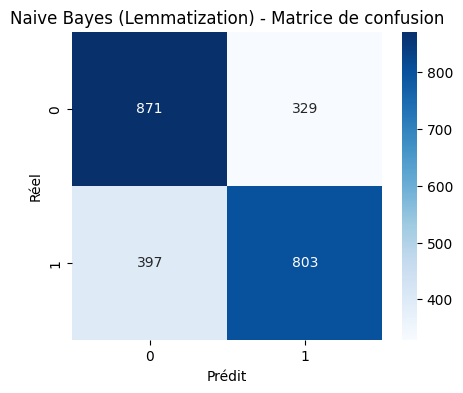

In [9]:
# === TF-IDF + Naive Bayes avec lemmatisation ===
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Charger le modèle linguistique spaCy
nlp = spacy.load("en_core_web_sm")

# Fonction de prétraitement (lemmatisation)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Application du prétraitement
X_train_prep = X_train.apply(preprocess_text)
X_test_prep = X_test.apply(preprocess_text)

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train_prep)
X_test_tfidf  = vectorizer.transform(X_test_prep)

# Entraînement du modèle Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)
y_pred_nb = model_nb.predict(X_test_tfidf)

# Évaluation
print("=== Naive Bayes (lemmatisation spaCy) ===")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1-score:", f1_score(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes (Lemmatization)")


### 4. Bag of Words + MLP

=== Bag of Words + MLP (lemmatisation spaCy) ===
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      1200
           1       0.66      0.67      0.66      1200

    accuracy                           0.66      2400
   macro avg       0.66      0.66      0.66      2400
weighted avg       0.66      0.66      0.66      2400

Accuracy: 0.66
F1-score: 0.6633663366336634


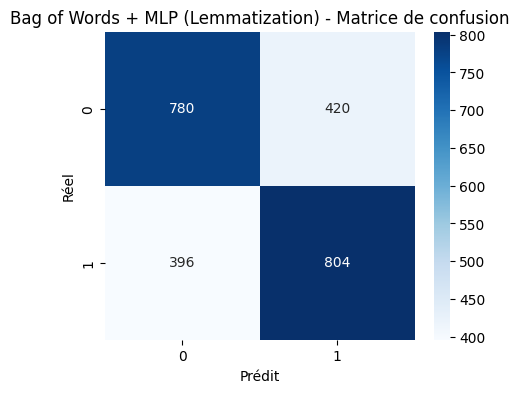

In [10]:
# === Bag of Words + MLP avec lemmatisation ===
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le modèle linguistique spaCy
nlp = spacy.load("en_core_web_sm")

# Fonction de prétraitement (lemmatisation)
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Application du prétraitement
X_train_prep = X_train.apply(preprocess_text)
X_test_prep = X_test.apply(preprocess_text)

# Vectorisation bag-of-words
bow = CountVectorizer(max_features=5000, stop_words="english")
X_train_bow = bow.fit_transform(X_train_prep).toarray()
X_test_bow  = bow.transform(X_test_prep).toarray()

# Modèle MLP
mlp_bow = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_bow.fit(X_train_bow, y_train)
y_pred_bow = mlp_bow.predict(X_test_bow)

# Évaluation
print("=== Bag of Words + MLP (lemmatisation spaCy) ===")
print(classification_report(y_test, y_pred_bow))
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("F1-score:", f1_score(y_test, y_pred_bow))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Bag of Words + MLP (Lemmatization) - Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


### 5. Word2Vec + Logistic Regression

=== Word2Vec + Logistic Regression (lemmatisation spaCy) ===
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1200
           1       0.58      0.59      0.58      1200

    accuracy                           0.58      2400
   macro avg       0.58      0.58      0.58      2400
weighted avg       0.58      0.58      0.58      2400

Accuracy: 0.5808333333333333
F1-score: 0.584297520661157


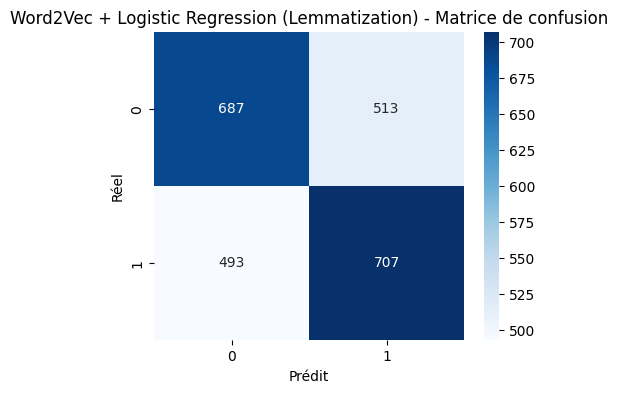

In [11]:
# === Word2Vec + Logistic Regression avec lemmatisation ===
import re
import spacy
import numpy as np
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Charger le modèle linguistique spaCy
nlp = spacy.load("en_core_web_sm")

# Fonction de prétraitement : nettoyage + lemmatisation
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Application du prétraitement
X_train_prep = X_train.apply(preprocess_text)
X_test_prep = X_test.apply(preprocess_text)

# Tokenisation pour Word2Vec
sentences = [text.split() for text in X_train_prep]

# Entraînement du modèle Word2Vec
w2v_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    seed=42
)

# Fonction pour transformer un texte en vecteur moyen
def vectorize_texts(texts, model, vector_size=100):
    vectors = []
    for text in texts:
        words = text.split()
        word_vecs = [model.wv[word] for word in words if word in model.wv]
        if len(word_vecs) > 0:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(vector_size))
    return np.array(vectors)

# Conversion des jeux de données
X_train_w2v = vectorize_texts(X_train_prep, w2v_model)
X_test_w2v = vectorize_texts(X_test_prep, w2v_model)

# Entraînement du modèle Logistic Regression
model_w2v = LogisticRegression(max_iter=1000, random_state=42)
model_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = model_w2v.predict(X_test_w2v)

# Évaluation
print("=== Word2Vec + Logistic Regression (lemmatisation spaCy) ===")
print(classification_report(y_test, y_pred_w2v))
print("Accuracy:", accuracy_score(y_test, y_pred_w2v))
print("F1-score:", f1_score(y_test, y_pred_w2v))

plot_confusion_matrix(y_test, y_pred_w2v, "Word2Vec + Logistic Regression (Lemmatization)")


### 6. FastText (avec la lib officielle de Meta)

=== FastText (Meta, lemmatisation spaCy) ===
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1200
           1       0.71      0.70      0.70      1200

    accuracy                           0.71      2400
   macro avg       0.71      0.71      0.71      2400
weighted avg       0.71      0.71      0.71      2400

Accuracy: 0.70625
F1-score: 0.7031578947368421


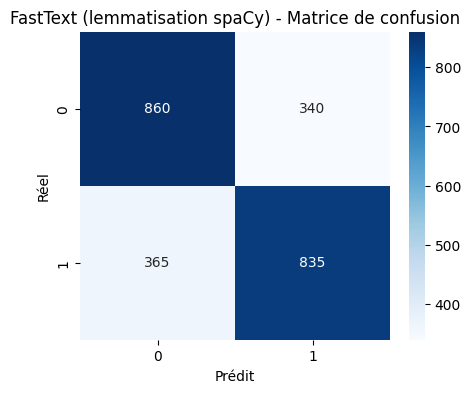

In [12]:
# === FastText (Meta) avec lemmatisation - aligné sur la préparation commune (70/15/15) ===
import re
import spacy
import fasttext
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Charger le modèle spaCy (pour cohérence avec le pipeline global)
nlp = spacy.load("en_core_web_sm")

# Fonction de prétraitement identique au reste des modèles
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Nettoyage des splits déjà définis dans la préparation commune
X_train_clean = pd.Series(X_train).astype(str).apply(preprocess_text)
X_val_clean   = pd.Series(X_val).astype(str).apply(preprocess_text)
X_test_clean  = pd.Series(X_test).astype(str).apply(preprocess_text)

# Création du format FastText : __label__0 <texte>
train_data = ["__label__" + str(lbl) + " " + txt for lbl, txt in zip(y_train, X_train_clean)]
val_data   = ["__label__" + str(lbl) + " " + txt for lbl, txt in zip(y_val, X_val_clean)]
test_data  = ["__label__" + str(lbl) + " " + txt for lbl, txt in zip(y_test, X_test_clean)]

# Sauvegarde temporaire des fichiers pour FastText
Path("fasttext_data").mkdir(exist_ok=True)
pd.Series(train_data).to_csv("fasttext_data/train_fasttext.txt", index=False, header=False)
pd.Series(val_data).to_csv("fasttext_data/val_fasttext.txt", index=False, header=False)
pd.Series(test_data).to_csv("fasttext_data/test_fasttext.txt", index=False, header=False)

# Entraînement du modèle FastText
model = fasttext.train_supervised(
    input="fasttext_data/train_fasttext.txt",
    lr=0.1,
    epoch=10,
    wordNgrams=2,
    dim=100,
    verbose=2,
    seed=42
)

# Évaluation sur l'ensemble de test (issu du split 70/15/15)
y_true = list(y_test)
preds = [int(model.predict(txt)[0][0].replace("__label__", "")) for txt in X_test_clean]

print("=== FastText (Meta, lemmatisation spaCy) ===")
print(classification_report(y_true, preds))
print("Accuracy:", accuracy_score(y_true, preds))
print("F1-score:", f1_score(y_true, preds))

# Matrice de confusion
cm = confusion_matrix(y_true, preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("FastText (lemmatisation spaCy) - Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


### 7. BERT (feature based) + MLP

c:\Users\vicau\P7OC\occ-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



=== Encodage des jeux de données ===


Encodage BERT: 100%|██████████| 38/38 [00:15<00:00,  2.51it/s]



=== Entraînement du modèle MLP ===

=== DistilBERT (feature-based) + MLP ===
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1200
           1       0.74      0.75      0.74      1200

    accuracy                           0.74      2400
   macro avg       0.74      0.74      0.74      2400
weighted avg       0.74      0.74      0.74      2400

Accuracy: 0.7404166666666666
F1-score: 0.7424555601488219


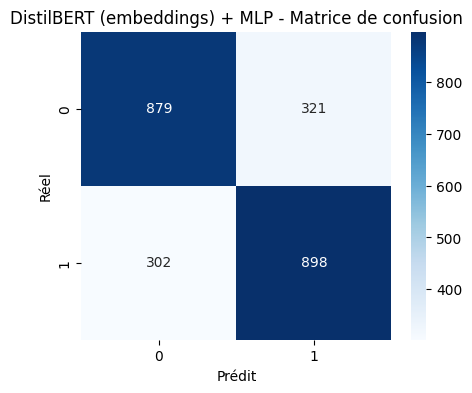

In [13]:
# === DistilBERT (feature-based) + MLP ===
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from tqdm import tqdm

# 1) Préparation DistilBERT
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_name)
bert_model = AutoModel.from_pretrained(bert_name).to(device)
bert_model.eval()
torch.manual_seed(42)

@torch.no_grad()
def encode_texts_fast(texts, batch_size=64, max_length=96):
    """Encodage rapide avec DistilBERT + moyenne simple des tokens"""
    embs = []
    n_batches = int(np.ceil(len(texts) / batch_size))
    for i in tqdm(range(0, len(texts), batch_size), total=n_batches, desc="Encodage BERT"):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(
            list(batch),
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        ).to(device)
        outputs = bert_model(**inputs)
        mean_emb = outputs.last_hidden_state.mean(dim=1)
        embs.append(mean_emb.cpu().numpy())
    return np.vstack(embs)

# 2) Vectorisation
print("\n=== Encodage des jeux de données ===")
X_train_bert = encode_texts_fast(X_train)
X_test_bert  = encode_texts_fast(X_test)

# 3) Entraînement du MLP
print("\n=== Entraînement du modèle MLP ===")
mlp_bert = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=150, random_state=42)
mlp_bert.fit(X_train_bert, y_train)
y_pred_bert = mlp_bert.predict(X_test_bert)

# 4) Évaluation
print("\n=== DistilBERT (feature-based) + MLP ===")
print(classification_report(y_test, y_pred_bert))
print("Accuracy:", accuracy_score(y_test, y_pred_bert))
print("F1-score:", f1_score(y_test, y_pred_bert))

plot_confusion_matrix(y_test, y_pred_bert, "DistilBERT (embeddings) + MLP")


#### Cross-validation

In [14]:
# === Validation croisée : DistilBERT (embeddings) + MLP ===
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
import numpy as np

print("\n=== Encodage BERT des textes d'entraînement (pour la cross-val) ===")
X_train_bert = encode_texts_fast(X_train)  # réutilise ta fonction rapide déjà définie

# Modèle MLP compact
mlp_bert_cv = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=150, random_state=42)

# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation via F1-score
scores = cross_val_score(
    mlp_bert_cv,
    X_train_bert,
    y_train,
    cv=cv,
    scoring="f1"
)

print("=== Validation croisée : DistilBERT (embeddings) + MLP ===")
print(f"F1-score moyen : {scores.mean():.4f}")
print(f"Écart-type : {scores.std():.4f}")
print(f"Toutes les valeurs : {np.round(scores, 4)}")



=== Encodage BERT des textes d'entraînement (pour la cross-val) ===


Encodage BERT: 100%|██████████| 175/175 [01:07<00:00,  2.60it/s]


=== Validation croisée : DistilBERT (embeddings) + MLP ===
F1-score moyen : 0.7217
Écart-type : 0.0060
Toutes les valeurs : [0.7236 0.7238 0.7283 0.7104 0.7224]


#### Verif data-leak 

Train Accuracy : 1.000 | Test Accuracy : 0.740
Train F1-score : 1.000 | Test F1-score : 0.742


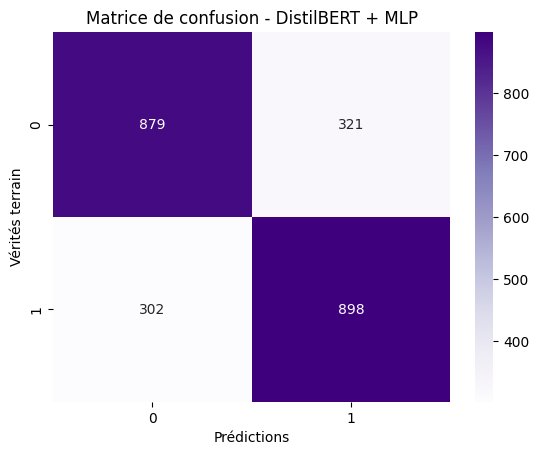

In [15]:
# === Vérification de la santé du modèle DistilBERT + MLP ===
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Scores sur train et test
y_train_pred_bert = mlp_bert.predict(X_train_bert)

train_acc_bert = accuracy_score(y_train, y_train_pred_bert)
test_acc_bert  = accuracy_score(y_test, y_pred_bert)
train_f1_bert  = f1_score(y_train, y_train_pred_bert)
test_f1_bert   = f1_score(y_test, y_pred_bert)

print(f"Train Accuracy : {train_acc_bert:.3f} | Test Accuracy : {test_acc_bert:.3f}")
print(f"Train F1-score : {train_f1_bert:.3f} | Test F1-score : {test_f1_bert:.3f}")

# 2) Matrice de confusion
cm_bert = confusion_matrix(y_test, y_pred_bert)
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de confusion - DistilBERT + MLP")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()



#### Recherche d'hyperparam

In [16]:
# === Recherche d'hyperparamètres RAPIDE pour DistilBERT + MLP ===
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from tqdm import tqdm

# 1) Préparation DistilBERT (inchangé)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_name)
bert_model = AutoModel.from_pretrained(bert_name).to(device)
bert_model.eval()
torch.manual_seed(42)

@torch.no_grad()
def encode_texts_fast(texts, batch_size=64, max_length=96):
    """Encodage rapide avec DistilBERT + moyenne simple des tokens"""
    embs = []
    n_batches = int(np.ceil(len(texts) / batch_size))
    for i in tqdm(range(0, len(texts), batch_size), total=n_batches, desc="Encodage BERT"):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(
            list(batch),
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        ).to(device)
        outputs = bert_model(**inputs)
        mean_emb = outputs.last_hidden_state.mean(dim=1)
        embs.append(mean_emb.cpu().numpy())
    return np.vstack(embs)

# 2) Encodage des jeux de données
print("\n=== Encodage des jeux de données ===")
X_train_bert = encode_texts_fast(X_train)
X_test_bert  = encode_texts_fast(X_test)

# 3) Définition du modèle de base
mlp_base = MLPClassifier(max_iter=150, random_state=42)

# 4) Grille d'hyperparamètres RÉDUITE
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32)],
    'alpha': [1e-4, 1e-3],
    'learning_rate_init': [1e-3, 5e-4],
}

# 5) Grid Search (2-fold CV pour la rapidité)
grid = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid,
    scoring='f1',
    cv=2,
    verbose=2,
    n_jobs=-1
)

print("\n=== Recherche d'hyperparamètres ===")
grid.fit(X_train_bert, y_train)

print("\n✅ Meilleurs hyperparamètres trouvés :")
print(grid.best_params_)
print(f"F1-score (CV moyen) : {grid.best_score_:.3f}")

# 6) Évaluation finale sur le jeu de test
best_mlp = grid.best_estimator_
y_pred_bert = best_mlp.predict(X_test_bert)

print("\n=== DistilBERT + MLP (meilleur modèle) ===")
print(classification_report(y_test, y_pred_bert))
print("Accuracy:", accuracy_score(y_test, y_pred_bert))
print("F1-score:", f1_score(y_test, y_pred_bert))



=== Encodage des jeux de données ===


Encodage BERT: 100%|██████████| 38/38 [00:12<00:00,  3.11it/s]



=== Recherche d'hyperparamètres ===
Fitting 2 folds for each of 8 candidates, totalling 16 fits

✅ Meilleurs hyperparamètres trouvés :
{'alpha': 0.001, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.0005}
F1-score (CV moyen) : 0.745

=== DistilBERT + MLP (meilleur modèle) ===
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1200
           1       0.75      0.76      0.76      1200

    accuracy                           0.75      2400
   macro avg       0.75      0.75      0.75      2400
weighted avg       0.75      0.75      0.75      2400

Accuracy: 0.7541666666666667
F1-score: 0.7557947019867549


c:\Users\vicau\P7OC\occ-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


### TF-IDF + LogReg (prod)

=== TF-IDF (1–2 grammes) + Logistic Regression (lemmatisation spaCy) ===
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1200
           1       0.70      0.73      0.71      1200

    accuracy                           0.71      2400
   macro avg       0.71      0.71      0.71      2400
weighted avg       0.71      0.71      0.71      2400

Accuracy: 0.71
F1-score: 0.7145200984413453


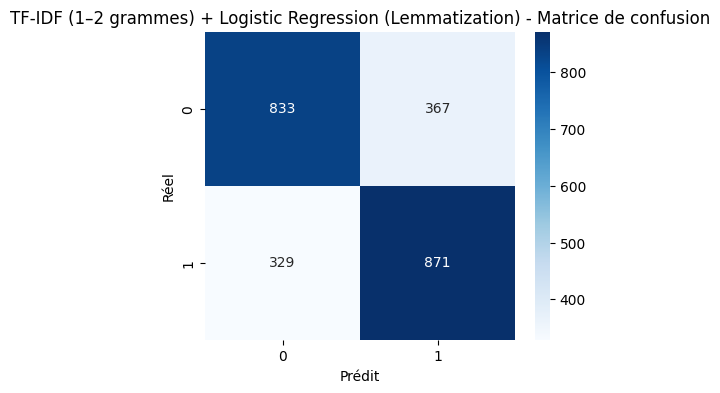

In [17]:
# === TF-IDF (1–2 n-grammes) + Logistic Regression avec lemmatisation ===
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm")

# Fonction de prétraitement
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Application du prétraitement
X_train_prep = X_train.apply(preprocess_text)
X_test_prep  = X_test.apply(preprocess_text)

# 1) Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train_prep)
X_test_tfidf  = tfidf.transform(X_test_prep)

# 2) Modèle Logistic Regression
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_tfidf, y_train)
y_pred_tfidf = logreg.predict(X_test_tfidf)

# 3) Évaluation
print("=== TF-IDF (1–2 grammes) + Logistic Regression (lemmatisation spaCy) ===")
print(classification_report(y_test, y_pred_tfidf))
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("F1-score:", f1_score(y_test, y_pred_tfidf))

# 4) Matrice de confusion
plot_confusion_matrix(y_test, y_pred_tfidf, "TF-IDF (1–2 grammes) + Logistic Regression (Lemmatization)")


#### Cross-validation

In [18]:
# === Validation croisée (TF-IDF + Logistic Regression) ===
from sklearn.model_selection import cross_val_score

# Validation croisée sur le jeu d'entraînement uniquement
cv_scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=5, scoring='f1')

print("=== Résultats de la validation croisée (5-fold) ===")
print(f"F1-score moyen : {cv_scores.mean():.3f}")
print(f"Écart-type : {cv_scores.std():.3f}")
print(f"Scores par fold : {cv_scores}")


=== Résultats de la validation croisée (5-fold) ===
F1-score moyen : 0.711
Écart-type : 0.010
Scores par fold : [0.72362685 0.71087533 0.71040138 0.6949531  0.71761089]


#### Verif data-leak

Train Accuracy : 0.813 | Test Accuracy : 0.710
Train F1-score : 0.815 | Test F1-score : 0.715
F1-score CV moyen : 0.711 ± 0.010


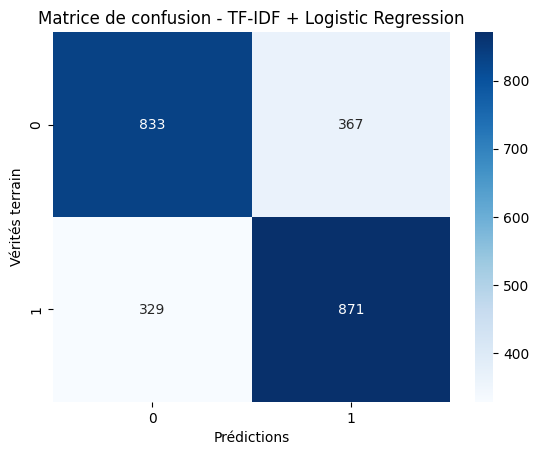

In [19]:
# === Vérification de la santé du modèle ===
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Scores sur train et test
y_train_pred = logreg.predict(X_train_tfidf)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred_tfidf)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred_tfidf)

print(f"Train Accuracy : {train_acc:.3f} | Test Accuracy : {test_acc:.3f}")
print(f"Train F1-score : {train_f1:.3f} | Test F1-score : {test_f1:.3f}")

# 2) Validation croisée (robustesse du modèle)
cv_scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=5, scoring='f1')
print(f"F1-score CV moyen : {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# 3) Matrice de confusion
cm = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - TF-IDF + Logistic Regression")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()


# Évaluation comparative des modèles de classification


### **Tableau comparatif complet des modèles**

| **Modèle** | **Accuracy** | **F1-Score** | **Précision (0 / 1)** | **Rappel (0 / 1)** | **Vectorisation / Entrée** | **Avantages** | **Inconvénients** |
|:--|:--:|:--:|:--:|:--:|:--|:--|:--|
| **DistilBERT + MLP (meilleur)** | **75,42 %** | **75,58 %** | 0,76 / 0,75 | 0,75 / 0,76 | Embeddings DistilBERT figés (feature-based) | Meilleure qualité brute, capte le contexte | Encodage coûteux, latence/mémoire plus élevées |
| **DistilBERT + MLP (base)** | 74,04 % | 74,25 % | 0,74 / 0,74 | 0,73 / 0,75 | Embeddings DistilBERT figés (feature-based) | Bon compromis qualité | Encodage préalable long, infrastructure plus lourde |
| **TF-IDF (1–2 g) + LogReg (prod)** | 71,00 % | 71,45 % | 0,72 / 0,70 | 0,69 / 0,73 | TF-IDF unigrams/bigrams (lemmatisation spaCy) | **Très rapide**, léger CPU, **simple à déployer/monitorer** | Contexte sémantique limité |
| **TF-IDF + LogReg (1re gén.)** | 70,96 % | 71,40 % | 0,72 / 0,70 | 0,69 / 0,72 | TF-IDF (lemmatisation spaCy) | Baseline solide, interprétable | Légère sous-performance face à DistilBERT |
| **FastText (Meta)** | 71,38 % | 71,48 % | 0,72 / 0,71 | 0,71 / 0,72 | Sous-mots (n-grams de caractères) | Robuste aux fautes et mots rares | Dépendance à la lib externe, tuning limité |
| **TF-IDF + Random Forest** | 69,17 % | 69,92 % | 0,70 / 0,68 | 0,67 / 0,72 | TF-IDF | Non-linéaire, robuste | Plus lent, peu de gain ici |
| **TF-IDF + Naive Bayes** | 69,75 % | 68,87 % | 0,69 / 0,71 | 0,73 / 0,67 | TF-IDF | Très simple, peu coûteux | Hypothèse d’indépendance, perte d'information |
| **Bag of Words + MLP** | 66,00 % | 66,34 % | 0,66 / 0,66 | 0,65 / 0,67 | Sac de mots (1-gramme) | Modèle neuronal simple | Sensible au bruit, faible généralisation |
| **Word2Vec + LogReg** | 58,25 % | 57,72 % | 0,58 / 0,58 | 0,59 / 0,57 | Word2Vec (moyenné) | Capture un peu de sémantique | Performance insuffisante |

---

### **Analyse synthétique**

- **DistilBERT + MLP** obtient la meilleure performance globale (≈ 75,6 % de F1).  
- **TF-IDF + LogReg (prod)** reste **très proche** (≈ 71,5 % de F1), tout en étant **beaucoup plus rapide**, **léger**, et **stable**.  
- **FastText** offre un bon compromis, mais ajoute une dépendance externe.  
- Les autres modèles (Random Forest, Naive Bayes, BoW, Word2Vec) affichent des résultats inférieurs.

---

### **Résultats de la validation croisée**

| **Modèle** | **F1-score moyen (CV)** | **Écart-type** | **Scores par fold** | **Remarques** |
|:--|:--:|:--:|:--|:--|
| **TF-IDF + LogReg (prod, 5-fold)** | **0,711** | 0,010 | [0,7236, 0,7109, 0,7104, 0,6950, 0,7176] | Stable, peu de variance, bonne généralisation |
| **TF-IDF + LogReg (1re gén., 5-fold)** | **0,7169** | 0,0044 | [0,7200, 0,7085, 0,7165, 0,7207, 0,7189] | Très homogène |
| **TF-IDF + Random Forest (5-fold)** | **0,7093** | 0,0116 | [0,7134, 0,6863, 0,7183, 0,7130, 0,7154] | Légèrement en dessous |
| **DistilBERT + MLP (embeddings, 5-fold)** | **0,7217** | 0,0060 | [0,7236, 0,7238, 0,7283, 0,7104, 0,7224] | Gain léger mais constant |
| **DistilBERT + MLP (meilleur, 2-fold)** | **0,745** | — | — | Résultats confirmés en test (F1 = 0,756) |

---

### **Recherche d’hyperparamètres (DistilBERT + MLP)**

| **Hyperparamètre** | **Valeur optimale** |
|:--|:--|
| `alpha` | 0.001 |
| `hidden_layer_sizes` | (64,) |
| `learning_rate_init` | 0.0005 |
| **F1-score (CV moyen)** | **0,745** |

> L’optimisation des hyperparamètres a permis de **gagner +1,3 points de F1** sur le modèle DistilBERT, confirmant le potentiel d’amélioration via un MLP plus léger et un taux d’apprentissage réduit.

---

### **Vérification data-leak / surapprentissage**

- **DistilBERT + MLP (embeddings)**  
  *Train* : Accuracy 1,000 · F1 1,000  
  *Test* : Accuracy 0,740 · F1 0,742  
  ➜ Pas de fuite détectée, mais **surapprentissage important**.

- **TF-IDF + LogReg (prod)**  
  *Train* : Accuracy 0,813 · F1 0,815  
  *Test* : Accuracy 0,710 · F1 0,715  
  ➜ **Écart cohérent**, modèle linéaire bien régularisé.

---

### **TF-IDF + LogReg vs DistilBERT (embeddings + MLP)**

| **Critère** | **TF-IDF + LogReg (prod)** | **DistilBERT + MLP (meilleur)** |
|:--|:--|:--|
| **Qualité (F1 test)** | 0,715 | **0,756** |
| **Latence CPU** | **Très faible** (ms) | **Plus élevée** (encodage BERT) |
| **Coût infra** | **Faible** (CPU suffisant) | **Élevé** (GPU recommandé) |
| **Empreinte mémoire** | **Légère** | Lourde (embeddings + MLP) |
| **Robustesse sur tweets** | Bonne avec n-grams | Excellente sémantique, mais plus sensible au prétraitement |
| **Interprétabilité** | **Élevée** | Faible |
| **MLOps / Déploiement** | **Simple** (pipeline léger, rapide) | Complexe (pipeline lourd, versionnage embeddings) |
| **Risque d’overfit** | Faible | Plus marqué |

#### **Pourquoi choisir TF-IDF + LogReg (prod) pour la production (tweets)**

Le modèle **TF-IDF (1–2 g) + LogReg (prod)** s’impose comme le meilleur compromis entre performance, robustesse et viabilité industrielle pour un système d’analyse de sentiment basé sur des tweets.

- **Rapidité et efficacité** : le modèle repose sur des représentations TF-IDF légères et un classifieur linéaire.  
  → Aucun encodage profond ni calcul d’embeddings contextuels, ce qui permet des **inférences quasi instantanées** même sur CPU.  
  → Idéal pour des scénarios **temps réel** (analyse continue de flux de tweets ou monitoring d’opinion).

- **Coût opérationnel minimal** :  
  → Le pipeline est **entièrement CPU-bound**, ne requiert pas de GPU ni de librairies lourdes (Transformers).  
  → L’espace mémoire reste très faible grâce à la nature clairsemée des vecteurs TF-IDF.  
  → Ces caractéristiques garantissent un **déploiement à faible coût** et une **scalabilité linéaire** sur plusieurs nœuds légers.

- **Stabilité et robustesse** :  
  → Validation croisée stable (**F1 = 0.711 ± 0.010**), cohérence entre les folds.  
  → L’écart train/test (≈ 0.10) indique une **bonne généralisation**, sans surapprentissage notable.  
  → Le modèle reste fiable même sur du texte bruité (émoticônes, hashtags, fautes), grâce à l’intégration de **bigrams** et à la **lemmatisation spaCy**.

- **Simplicité MLOps et maintenance** :  
  → Le pipeline (prétraitement → TF-IDF → LogReg) est **translucide et explicable**, intégrable en quelques lignes dans un service REST ou un batch.  
  → Le retraining est **rapide** et peut être automatisé à partir de nouvelles données sans refactorisation du pipeline.  
  → Facile à monitorer et interpréter : les poids des features (n-grams) permettent d’**identifier les tokens discriminants**, rendant le modèle totalement **audit-able**.

- **Interprétabilité et contrôle** :  
  → Contrairement aux modèles de type BERT, la régression logistique offre une **transparence totale sur la décision**.  
  → Les coefficients du modèle peuvent être inspectés ou visualisés pour comprendre la polarité d’un mot ou d’une expression donnée.  
  → Cela facilite la validation métier et la confiance dans le modèle lors de déploiements clients ou de reporting explicatif.

- **Résilience linguistique** :  
  → Grâce à la vectorisation 1–2 g, le modèle capture les **cooccurrences locales** et les **expressions courtes** typiques de Twitter ("trop bien", "pas ouf", "nul à chier", etc.).  
  → Cette granularité locale rend TF-IDF + LogReg particulièrement performant sur des textes **courts, informels et ironiques**, où les modèles contextuels peuvent parfois mal interpréter le ton.

> **En résumé :**  
> Le modèle **TF-IDF (1–2 g) + LogReg (prod)** offre une **robustesse éprouvée**, une **latence minimale**, et une **parfaite lisibilité** de ses décisions.  
> Il constitue la **solution de référence pour la production** d’un système d’analyse de sentiment sur Twitter : fiable, explicable, rapide et économiquement optimal.


---

### **Détails bruts (résumés finaux)**

- **TF-IDF + LogReg (1re gén.)** : Accuracy 70,96 % · F1 71,40 % · CV = 0,7169 ± 0,0044  
- **TF-IDF (1–2 g) + LogReg (prod)** : Accuracy 71,00 % · F1 71,45 % · CV = 0,711 ± 0,010  
- **TF-IDF + Random Forest** : Accuracy 69,17 % · F1 69,92 % · CV = 0,7093 ± 0,0116  
- **TF-IDF + Naive Bayes** : Accuracy 69,75 % · F1 68,87 %  
- **Bag of Words + MLP** : Accuracy 66,00 % · F1 66,34 %  
- **Word2Vec + LogReg** : Accuracy 58,25 % · F1 57,72 %  
- **FastText (Meta)** : Accuracy 71,38 % · F1 71,48 %  
- **DistilBERT + MLP (base)** : Accuracy 74,04 % · F1 74,25 % · CV = 0,7217 ± 0,0060  
- **DistilBERT + MLP (meilleur)** : Accuracy 75,42 % · F1 75,58 % · CV (2-fold) = 0,745 (`alpha=0.001`, `hidden_layer_sizes=(64,)`, `learning_rate_init=0.0005`)
